In [89]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

df1 = pd.read_csv('data.csv')

df1.head(5)

,p,y,t,fip_title,c,q,res
0,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,Handle_System
1,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,ORCID
2,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,DOI
3,F1,2019,MD,ACTRIS-ASC_FIP_2019,ACTRIS-ASC,F1-MD,UUID
4,F1,2020,MD,ACTRIS-ASC_FIP_2020,ACTRIS-ASC,F1-MD,UUID


In [115]:
d = []

principles = ['F1', 'F2', 'F3', 'F4', 'A1.1', 'A1.2', 'A2', 'I1', 'I2', 'I3', 'R1.1', 'R1.2']
years = [2019, 2020, 2021]

for year in years:
    d1 = {}
    d.append(d1)
    resources = Series(dtype='float64')
    for principle in principles:
        selection = df1[(df1['p'] == principle) & (df1['y'] == year)]['res']
        resources = pd.concat([resources, selection])
        unique = len(set(selection)) # Number of distinct resources in communities for the given year and principle
        total = len(selection) # Number of resources in communities for the given year and principle
        fraction = unique/total if total > 0 else 0
        # 5/5 means that all communities use different resources
        # 1/10 means that all communities use the same resource
        # The lower the fraction the better
        print('{} {} {} {} {}'.format(year, principle, unique, total, fraction))
        d1[principle] = fraction
    d1['R1.3'] = len(set(resources))/len(resources)
        

df2 = pd.DataFrame(d)
df2.index = years

2019 F1 8 41 0.1951219512195122
2019 F2 13 33 0.3939393939393939
2019 F3 5 12 0.4166666666666667
2019 F4 24 45 0.5333333333333333
2019 A1.1 16 68 0.23529411764705882
2019 A1.2 11 38 0.2894736842105263
2019 A2 5 5 1.0
2019 I1 8 45 0.17777777777777778
2019 I2 24 44 0.5454545454545454
2019 I3 27 49 0.5510204081632653
2019 R1.1 10 31 0.3225806451612903
2019 R1.2 6 24 0.25
2020 F1 11 49 0.22448979591836735
2020 F2 16 39 0.41025641025641024
2020 F3 6 14 0.42857142857142855
2020 F4 29 65 0.4461538461538462
2020 A1.1 18 90 0.2
2020 A1.2 14 49 0.2857142857142857
2020 A2 7 7 1.0
2020 I1 8 47 0.1702127659574468
2020 I2 31 64 0.484375
2020 I3 30 56 0.5357142857142857
2020 R1.1 11 36 0.3055555555555556
2020 R1.2 6 27 0.2222222222222222
2021 F1 12 67 0.1791044776119403
2021 F2 20 49 0.40816326530612246
2021 F3 6 19 0.3157894736842105
2021 F4 37 95 0.3894736842105263
2021 A1.1 18 105 0.17142857142857143
2021 A1.2 14 65 0.2153846153846154
2021 A2 9 13 0.6923076923076923
2021 I1 8 59 0.1355932203389830

In [91]:
df3 = df2.T
df3.head(3)

,2019,2020,2021
F1,0.195122,0.224490,0.179104
F2,0.393939,0.410256,0.408163
F3,0.416667,0.428571,0.315789


In [92]:
diff = []

# A negative difference means that there has been convergence along the principle
for index, row in df3.iterrows():
    diff.append(row[2021]-row[2019])

df3['Difference'] = diff

df3.sort_values(by='Difference', ascending=True)

,2019,2020,2021,Difference
A2,1.000000,1.000000,0.692308,-0.307692
F4,0.533333,0.446154,0.389474,-0.143860
R1.1,0.322581,0.305556,0.191489,-0.131091
I2,0.545455,0.484375,0.421053,-0.124402
F3,0.416667,0.428571,0.315789,-0.100877
A1.2,0.289474,0.285714,0.215385,-0.074089
A1.1,0.235294,0.200000,0.171429,-0.063866
R1.3,0.301149,0.285451,0.239832,-0.061318
R1.2,0.250000,0.222222,0.204545,-0.045455
I1,0.177778,0.170213,0.135593,-0.042185


In [135]:
# Good examples: F4, I1
principle = 'R1.2'

y1 = df1[(df1['p'] == principle) & (df1['y'] == 2019)]['res'].value_counts()
y2 = df1[(df1['p'] == principle) & (df1['y'] == 2021)]['res'].value_counts()

df4 = pd.DataFrame({'2019': y1, '2021': y2}, dtype='int64')

#df4 = df4.dropna()

df4 = df4[df4['2019'] != df4['2021']]

df4 = df4.sort_values(by='2019', ascending=False)

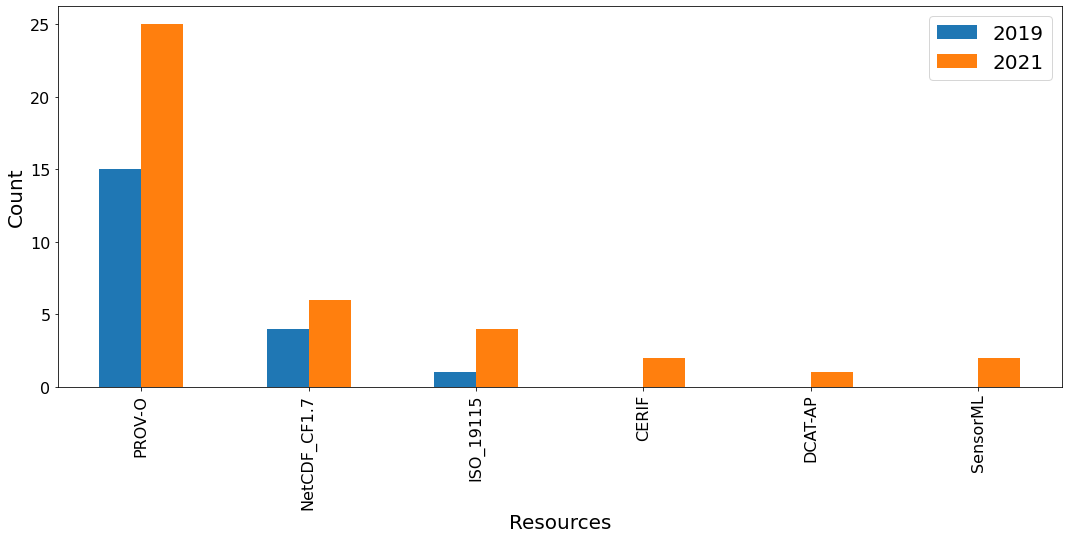

In [136]:
ax = df4.plot.bar(figsize=(18,7))
plt.legend(fontsize=20)
plt.xlabel('Resources', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()